In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from scipy.constants import pi

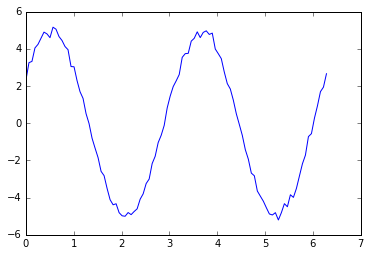

In [21]:
%matplotlib inline

####################################################################################################

def g(x, k, phi):                  #Signal
    return (np.sin(k*x + phi))

####################################################################################################

x = np.linspace(0, 2*pi, 101)
k = 2.     #Fitting parameter
phi = pi/6.     #Fitting Paramter
err_floor = 0.1
meas_err = np.cos(x)*0.2
var = err_floor**2 + meas_err**2
unc = sqrt(var)
y = 5*g(x, k, phi) + np.random.randn(x.shape[0])*unc     #Signal with noise added with a 5:1 Signal-to-Noise ratio

# print(meas_err, err_floor, var, unc)

coeffs, cov = curve_fit(g, x, y, p0 = [k, phi])
k_best = coeffs[0]
phi_best = coeffs[1]

plt.figure()
plt.plot(x, y)
plt.show()

####################################################################################################



In [41]:
%matplotlib inline

# def y_poly(x, *args):
#     y_model = ''
#     i = 0
#     for arg in args:
#         y_model.append(str(arg*x**i))
#         i += 1
#     return eval(y_model)
def y_poly(x, c0, c1, c2, c3, c4, c5, c6, c7, c8):
    y_model = c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4 + c5*x**5 + c6*x**6 + c7*x**7 + c8*x**8
    return y_model

coeffs1, cov1 = curve_fit(y_poly, x, y)
best_fit = np.array([i for i in coeffs1])

DOF = len(y) - len(coeffs1)
chi2 = (((y - y_poly(x, *best_fit))/unc)**2).sum()
chi2_nu = chi2/DOF

unc_c0 = cov1[0,0]**.5
unc_c1 = cov1[1,1]**.5

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})     #Formats print statement correctly using lambda function
print("Best-fit polynomial coefficients: {}".format(best_fit))
print("The covariance matrix: \n {}".format(cov1))

print("chi2, chi2_nu, DOF are {:.3f}, {:.3f}, {:2d}, respectively.".format(chi2, chi2_nu, DOF))

Best-fit polynomial coefficients: [2.966 -0.186 27.548 -53.297 35.636 -11.312 1.851 -0.150 0.005]
The covariance matrix: 
 [[0.032 -0.198 0.401 -0.380 0.195 -0.058 0.010 -0.001 0.000]
 [-0.198 1.860 -4.394 4.526 -2.450 0.750 -0.130 0.012 -0.000]
 [0.401 -4.394 11.200 -12.083 6.750 -2.114 0.374 -0.035 0.001]
 [-0.380 4.526 -12.083 13.446 -7.680 2.446 -0.439 0.041 -0.002]
 [0.195 -2.450 6.750 -7.680 4.461 -1.439 0.261 -0.025 0.001]
 [-0.058 0.750 -2.114 2.446 -1.439 0.469 -0.086 0.008 -0.000]
 [0.010 -0.130 0.374 -0.439 0.261 -0.086 0.016 -0.002 0.000]
 [-0.001 0.012 -0.035 0.041 -0.025 0.008 -0.002 0.000 -0.000]
 [0.000 -0.000 0.001 -0.002 0.001 -0.000 0.000 -0.000 0.000]]
chi2, chi2_nu, DOF are 212.968, 2.315, 92, respectively.


In [1]:
from scipy.optimize import curve_fit

def g(x, k, phi):
    return np.sin(k*x + phi)

coeffs, cov = curve_fit(g, x, y, p0 = [2, pi/6])

# coeffs gives the best-fit m and b.
k_best = coeffs[0]
phi_best = coeffs[1]
print('Best-fit k and phi, respectively: {:.3f} {:.3f}'.format(k_best, phi_best))

# The diagonal elements of the covariance matrix are the variances of the two fitting parameters.
k_sig = np.sqrt(cov[0, 0])
phi_sig = np.sqrt(cov[1, 1])
print('1 sigma error on best-fit k and phi, respectively: {:.3f} {:.3f}'.format(k_sig,phi_sig))

print('The coeffs array:\n', coeffs)
print('And the covariance matrix:\n', cov)
plt.errorbar(x, y, yerr = err, fmt = 'x')
plt.plot(x, g(x, k_best, phi_best ))
plt.plot(x, y, '.')


import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

k_start, k_end = k_best-5*k_sig, k_best+5*k_sig
phi_start, phi_end = phi_best-5*phi_sig, phi_best+5*phi_sig
xx, yy = np.mgrid[k_start:k_end:0.001, phi_start:phi_end:0.001]
print(xx.min(),xx.max(), yy.min(), yy.max())
# Create a grid of 2d coordinates 
xy = np.dstack((xx, yy))

# create a 2d Gaussian according to the best-fit (m, b) and the covariance matrix.
gauss2d = multivariate_normal(coeffs, cov)
# find probability
P = gauss2d.pdf(xy)
# calculate CDF
CDF_cf = compute_cdf(P)
extent = [k_start, k_end, phi_start, phi_end ]
# plotting
plt.figure()
plt.contour(CDF_cf.T, extent = extent, levels = contour_levels, linestyles=['--', '--', '--'], exten)
plt.scatter(coeffs[0], coeffs[1], marker = 'x', facecolor = 'r', s = 100)
plt.show()

SyntaxError: non-keyword arg after keyword arg (<ipython-input-1-14b5bd33bb16>, line 45)